Задание
1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.



а), б) (если представлено в виде значений скорости на конец одинаковых интервалов) и д)


2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('DUQ_hourly.csv', index_col = [0], parse_dates = [0])

In [4]:
data

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
...,...
2018-01-01 20:00:00,1962.0
2018-01-01 21:00:00,1940.0
2018-01-01 22:00:00,1891.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


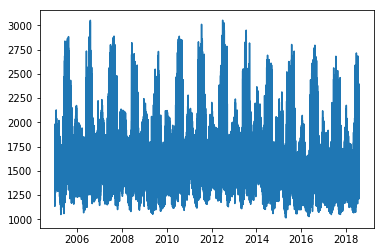

In [8]:
plt.plot(data)

In [18]:
import datetime

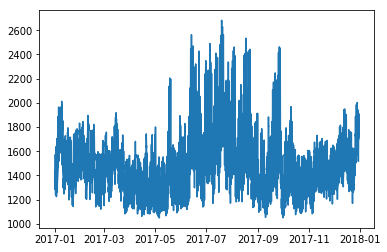

In [27]:
plt.plot(data.loc[(data.index > '01.01.2017') & (data.index <= '31.12.2017')])


Выборка содержит 119068 значений на конец каждого часа за период с 31/12/2005 по 02/01/2018, среднее значение - 1659, стандартное отклонение - 302. Пропусков нет, существенных выбросов нет. Есть видимая периодичность - максмальные значения в летние месяцы (видимо, работают кондиционеры) и локальные пики в январе-феврале (видимо, отопление в самые холодные месяцы)/

3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [43]:
brent = pd.read_excel('brent.xlsx', index_col = [0], parse_dates = [0])
brent

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59
...,...
2010-09-05,76.63
2010-09-04,76.62
2010-09-03,76.57


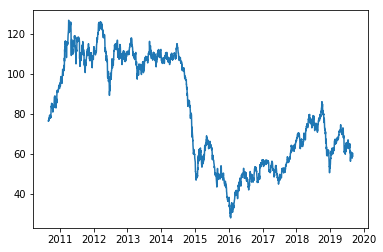

In [54]:
plt.plot(brent)

In [49]:
brent_weeks = brent.resample('W').mean()
brent_weeks

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667
...,...
2019-08-04,62.791667
2019-08-11,58.236667
2019-08-18,59.033333


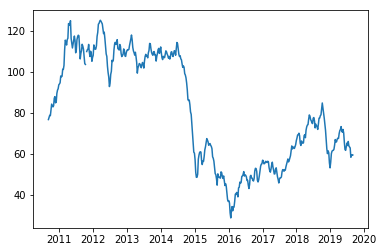

In [55]:
plt.plot(brent_weeks)

In [50]:
brent_months = brent.resample('M').mean()
brent_months

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200
...,...
2019-05-31,69.966667
2019-06-30,62.980400
2019-07-31,64.292963


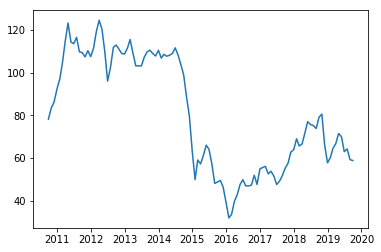

In [56]:
plt.plot(brent_months)

In [52]:
brent_years = brent.resample('Y').mean()
brent_years

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493
2015-12-31,53.969743
2016-12-31,45.350502
2017-12-31,54.720814
2018-12-31,71.651419


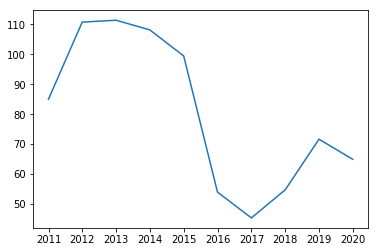

In [57]:
plt.plot(brent_years)

4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [73]:
brent_avg = {'weekly average': brent_weeks.mean()[0], 'monthly average':brent_months.mean()[0], 'annual average': brent_years.mean()[0]}
brent_avg

{'weekly average': 80.71293816631123,
 'monthly average': 80.57107684061064,
 'annual average': 80.52821863588186}

In [78]:
brent_std = {'weekly std': brent_weeks.std()[0], 'monthly std':brent_months.std()[0], 'annual std': brent_years.std()[0]}
brent_std

{'weekly std': 26.66129949704121,
 'monthly std': 26.66764520444439,
 'annual std': 25.68246689458575}

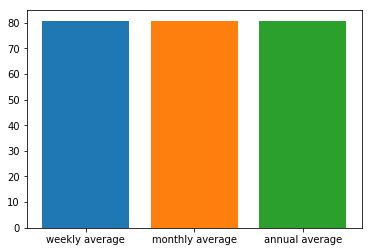

In [81]:
for key, value in brent_avg.items():
    plt.bar(key, value)
    

    

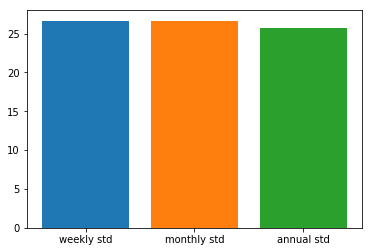

In [80]:
for key, value in brent_std.items():
    plt.bar(key, value)

5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Срок ресемплинга почти не влияет на статистику. 